Demonstrate applying calibration of phase and amplitude for a scan, where the calibration is read from a file written in the previous tutorial_08_scan_calibration.ipynb



In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
import Scan
import pickle
soc = TopSoc()

In [2]:
# Load the calibration written in tutorial_09_scan_calibration.ipynb
with open('calibration-demo.pkl', 'rb') as file:
    calibration = pickle.load(file)

In [3]:
# Show the keys that come with the calibration
calibration.keys()

dict_keys(['fMixer', 'fList', 'cInterps', 'fMin', 'fMax', 'fscan', 'nominalDelay'])

In [4]:
# Set up the mixer based on the setting used in the calibration.
soc.set_mixer(calibration['fMixer'])
# Choose tone frequencies that are within the range of calibrated frequencies
fMin = calibration['fMin']
fMax = calibration['fMax']
nTones = 3
delta = (fMax-fMin)/(nTones+1)

np.random.seed(12399512)
testFreqs = fMin + delta*(0.5+np.arange(nTones)) + np.random.uniform(0,0.1, size=nTones)
testAmps = 0.9*np.ones(len(testFreqs))/len(testFreqs)

testFis = np.random.uniform(0, 2*np.pi, size=len(testFreqs))
bandwidth = 0.4 # MHz
nf = 50
decimation = 2
nt = 3
doProgress = True

scan = Scan.Scan(soc)
testFScan = scan.fscan(testFreqs, testAmps, testFis, bandwidth, nf, decimation,nt, doProgress=doProgress)


  0%|          | 0/50 [00:00<?, ?it/s]

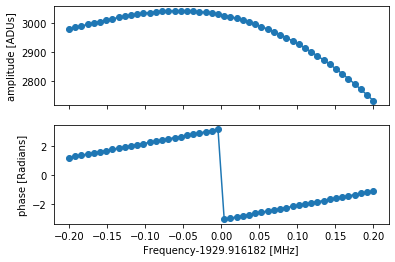

In [5]:
# Plot the measured amplitude,phase of one of the tones
Scan.fscanPlot(testFScan, 0)

In [7]:
# Apply the calibration. Notice that you don't need to calculate the nominal delay.
tfsCalib = scan.applyCalibration(testFScan, calibration, amplitudeMax=5000)


 Scan applyDelay:  apply delay = -10.191856938875626


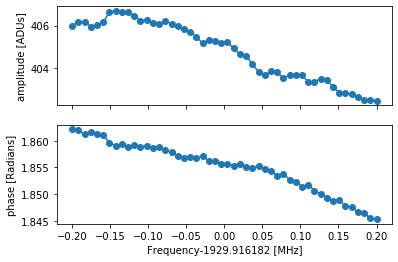

In [8]:
# Plot the calibrated amplitude,phase of one of the tones
Scan.fscanPlot(tfsCalib, 0)